## **Linear Regression.**

1. Simple Linear Regression:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_2 + w_3x_3 = \textbf{x}^T\textbf{w}$$

In there:
+ $y$ is the actual output value.
+ $\hat{y}$ is the output prediction value.
+ $\textbf{x} = [x_1, x_2, x_3]^T$ is the feature vector.
+ $\textbf{w} = [w_1, w_2, w_3]$ is weight vector.

Text(0, 0.5, 'Weight (kg)')

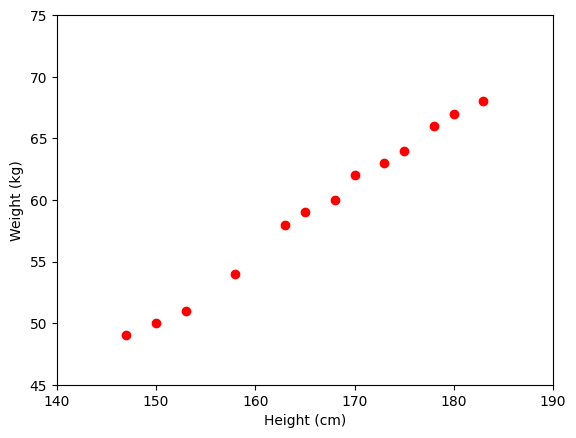

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T # each row is a point

# weight (kg)
y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

2. Bias trick:

$$y = \textbf{x}^T\textbf{w} + b$$

In which, $b$ is the free term, also known as *bias*. If we consider $x_0 = 1$ then we will have:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_2 + \ldots + w_Nx_N + bx_0 = \overline{\textbf{x}}^T\overline{\textbf{w}}$$

Where $\overline{\textbf{x}} = [x_0, x_1, x_2, \ldots, x_N]^T$ and $\overline{\textbf{w}} = [b, w_1, w_2, \ldots, w_N]$. This is Multiple Linear Regression.

3. Cost function and solution for the Linear Regression problem:

+ Cost function:

$$\mathcal{L}(\textbf{w}) = \frac{1}{2N}\sum_{i=1}^{N}(y_i - \textbf{x}_i^T\textbf{w})^2 = \frac{1}{2N}||\textbf{y} - \textbf{X}^T\textbf{w}||^2_2$$

Our goal is to find $\textbf{w}$ such that function $\mathcal{L}(\textbf{w})$ is least expensive: $\hat{\textbf{w}} = {\underset{\textbf{w}}{\operatorname{arg\,min}}}\mathcal{L}(\textbf{w})$

+ Solution for the Linear Regression problem:

$$\textbf{w} = (\textbf{X}\textbf{X}^T)^{\dagger}\textbf{Xy}$$

Where $\textbf{y} = [y_1, y_2, \ldots, y_N]^T$ and $\textbf{X} = [\textbf{x}_1, \textbf{x}_2, \ldots, \textbf{x}_N].$

If matrix $\textbf{X}\textbf{X}^T$ is invertible then $(\textbf{X}\textbf{X}^T)^{\dagger} = (\textbf{X}\textbf{X}^T)^{-1}$, otherwise $\textbf{X}\textbf{X}^T$ is determined based on the pseudo-inverse $(\textbf{X}\textbf{X}^T)^{\dagger}$. In Python, the pseudo-inverse has the syntax of `numpy.linalg.pinv`.

Text(0, 0.5, 'Weight (kg)')

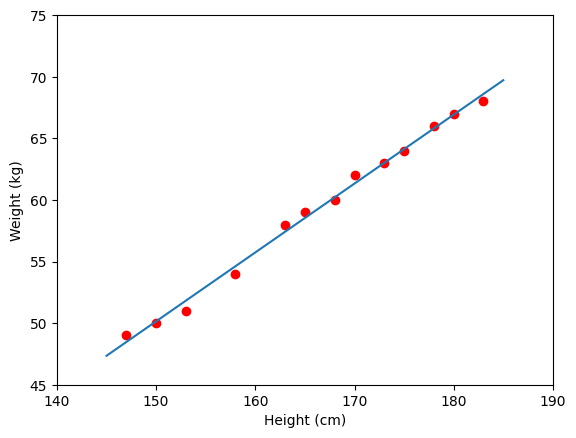

In [ ]:
# Building Xbar and use bias trick
one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1) # each point is one row

# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)

# weights
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1 * x0

# Drawing the fitting line
plt.plot(X, y, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

In [ ]:
y1 = w_1 * 155 + w_0
y2 = w_1 * 160 + w_0

print('Input 155cm, true output 52kg, predicted output %.2fkg'  %(y1))
print('Input 160cm, true output 56kg, predicted output %.2fkg'  %(y2))

Input 155cm, true output 52kg, predicted output 52.94kg
Input 160cm, true output 56kg, predicted output 55.74kg


We see that the predicted results are quite close to the actual data.

Next, we will use Python's `scikit-learn` library to find the solution:

In [ ]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

# Compare two results
print("scikit-learn's solution  : w_1 = ", regr.coef_[0], ", w_0 = ", regr.intercept_)
print("our solution             : w_1 = ", w[1], ", w_0 = ", w[0])

scikit-learn's solution  : w_1 =  0.5592049619396674 , w_0 =  -33.73541020580774
our solution             : w_1 =  0.5592049619425978 , w_0 =  -33.735410206298866


***Linear Regression is very sensitive to noise:*** In the case of noise, with a pair of data (150 cm, 70 kg), the results are greatly skewed.

w =  [22.21867545  0.23775985]


Text(0, 0.5, 'Weight (kg)')

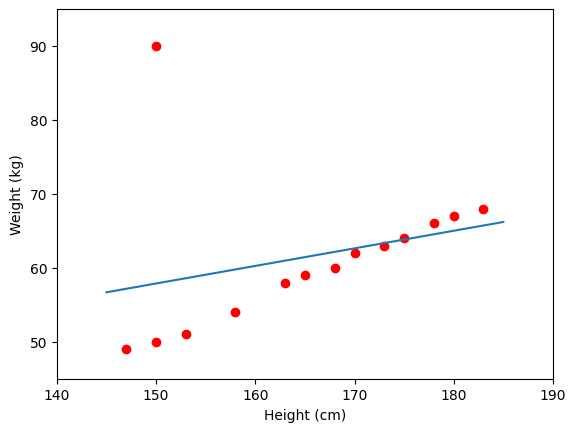

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183, 150]]).T

y = np.array([ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68, 90])

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)
w_0 = w[0]
w_1 = w[1]

x0 = np.linspace(145, 185, 2, endpoint=True)
y0 = w_0 + w_1*x0

plt.plot(X, y, 'ro')
plt.plot(x0, y0)
plt.axis([140, 190, 45, 95])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')

## **Polynomial Regression.**

Polynomial Regression is more commonly used with feature vectors of the form $[1, x_1, x_1^2, \ldots]^T$, consider $x_0 = 1$:

$$y\approx\hat{y} = f(\textbf{x}) = w_1x_1 + w_2x_1^2 + \ldots + w_Nx_1^N + bx_0$$

w =  [[-70.86022078  78.7687132  -28.99387406   3.4286372 ]]


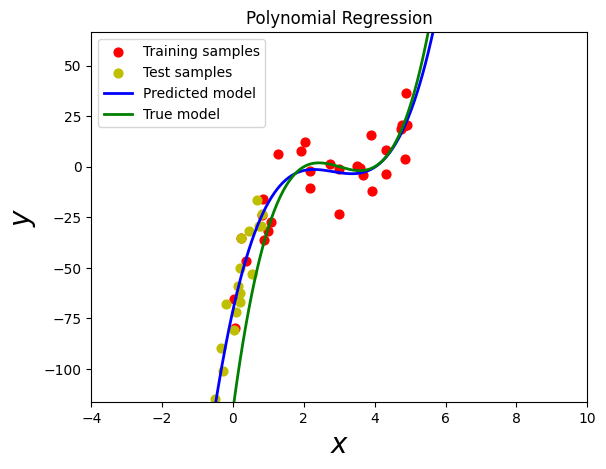

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

np.random.seed(4)

N = 30
N_test = 20

# Trainging set
X = np.random.rand(N, 1) * 5
y = 3 * (X - 2) * (X - 3) * (X - 4) + 10 * np.random.randn(N, 1)

# Test set
X_test = (np.random.rand(N_test, 1) - 1/2) * 2
y_test = 3 * (X_test - 2) * (X_test - 3) * (X_test-4) +  10 * np.random.randn(N_test, 1)

# Construct the matrix Xbar = [1, X, X^2, X^3, .... , X^d]^T
def buildX(X, d = 2):
  res = np.ones((X.shape[0], 1))
  for i in range(1, d + 1):
    res = np.concatenate((res, X**i), axis=1)
  return res

def myFit(X, y, d):
  Xbar = buildX(X, d)
  regr = linear_model.LinearRegression(fit_intercept=False)
  """
  In Python's `linear_model.LinearRegression` function, the `fit_intercep`t parameter is used to determine whether the model should calculate an intercept value.
    + If `fit_intercept=True` (default), the model will calculate the intercept. In this case, the data does not need to be centered.
    + If `fit_intercept=False`, the model does not calculate the intercept and the data is assumed to be centered. This means the model will pass through the origin.
  """
  regr.fit(Xbar, y)

  w = regr.coef_
  print('w = ', w)

  x0 = np.linspace(-1, 7, 200, endpoint=True)
  y0 = np.zeros_like(x0)
  for i in range(d + 1):
    y0 += w[0][i] * x0**i
  ytrue = 5 * (x0 - 2) * (x0 - 3) * (x0 - 4)

  # Draw the fitting line
  plt.scatter(X.T, y.T, c = 'r', s = 40, label='Training samples')
  plt.scatter(X_test.T, y_test.T, c = 'y', s = 40, label='Test samples')
  plt.plot(x0, y0, 'b', linewidth = 2, label="Predicted model")
  plt.plot(x0, ytrue, 'g', linewidth = 2, label="True model")
  plt.title('Polynomial Regression')
  plt.legend()
  plt.axis([-4, 10, np.amax(y_test) - 100, np.amax(y) + 30])
  plt.xlabel('$x$', fontsize = 20)
  plt.ylabel('$y$', fontsize = 20)

myFit(X, y, 3) # In this case, we just consider d = 3



Use functions available from Python:

w = [[ 78.7687132  -28.99387406   3.4286372 ]]


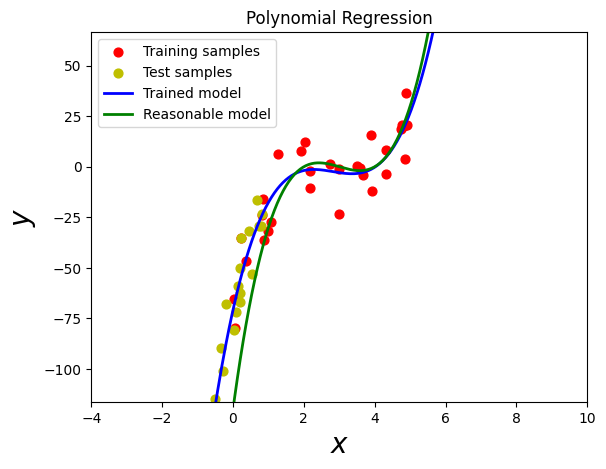

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(4)

N = 30
N_test = 20

# Training set
X = np.random.rand(N, 1) * 5
y = 3 * (X - 2) * (X - 3) * (X - 4) + 10 * np.random.randn(N, 1)

# Test set
X_test = (np.random.rand(N_test, 1) - 1/2) * 2
y_test = 3 * (X_test - 2) * (X_test - 3) * (X_test - 4) + 10 * np.random.randn(N_test, 1)

# Transform input data
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Print coefficients
print('w =', model.coef_)

# Generate x values
x0 = np.linspace(-1, 7, 200, endpoint=True).reshape(-1, 1)
x0_poly = poly.transform(x0)

# Predict y values
y0 = model.predict(x0_poly)
ytrue = 5 * (x0 - 2) * (x0 - 3) * (x0 - 4)

# Plot
plt.scatter(X, y, c='r', s=40, label='Training samples')
plt.scatter(X_test, y_test, c='y', s=40, label='Test samples')
plt.plot(x0, y0, 'b', linewidth=2, label="Trained model")
plt.plot(x0, ytrue, 'g', linewidth=2, label="Reasonable model")
plt.title('Polynomial Regression')
plt.legend()
plt.axis([-4, 10, np.amax(y_test) - 100, np.amax(y) + 30])
plt.xlabel('$x$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.show()


___
## **References:**

$[1].$ *Vũ Hữu Tiệp. Machine Learning cơ bản, Chapter 7, 2018.*

$[2].$ Source code for this part can be found [here](https://github.com/tiepvupsu/ebookML_src/tree/master/src/linear_regression).